# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [31]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [33]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [35]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We were traveling as a fami...
1,✅ Trip Verified | Flight at 8.40am from DUB to...
2,✅ Trip Verified | Terrible. I have traveled t...
3,✅ Trip Verified | The customer service is ugl...
4,✅ Trip Verified | Most uncomfortable flight I...


In [36]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [37]:
# Printing the Total Numbers of Rows and Columns

df.shape

(3572, 1)

In [38]:
# Printing the Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3572 non-null   object
dtypes: object(1)
memory usage: 28.0+ KB


In [39]:
# Printing Columns Nams

df.columns

Index(['reviews'], dtype='object')

In [40]:
# Printing Top 5 Rows

df.head()

,reviews
0,✅ Trip Verified | We were traveling as a fami...
1,✅ Trip Verified | Flight at 8.40am from DUB to...
2,✅ Trip Verified | Terrible. I have traveled t...
3,✅ Trip Verified | The customer service is ugl...
4,✅ Trip Verified | Most uncomfortable flight I...


In [41]:
# Printing Random 10 Rows

df.sample(10)

,reviews
630,✅ Trip Verified | I wouldn't even rate them 1...
175,Not Verified | DFW-LHR. Had an easy transfer ...
1482,✅ Verified Review | I am a frequent flyer wit...
2377,My husband and I flew to Vancouver with Britis...
149,✅ Trip Verified | I was pleasantly surprised ...
937,✅ Trip Verified | London to Cape Town. Waiti...
1303,✅ Verified Review | London Heathrow to Bangko...
1007,✅ Trip Verified | I thought it time BA deserv...
293,Not Verified | Our main complaint is that the...
2424,Check in a Gatwick for flight to Grenada was q...


In [42]:
# Printing Null Values

df.isnull().sum()

reviews    0
dtype: int64

In [43]:
# Printing First Review Columns

df.reviews[10]

'✅ Trip Verified | The flight schedule was delayed for one hour. After boarding the plane we were delayed at least another 30 minutes. When we arrived in London, we were delayed again for at least another 30 minutes to find a gate. We were left with 45 minutes only to catch our connecting flight to Barcelona, we needed to run and take the train to different terminal to catch our next connecting flight. When we arrived at Barcelona airport, we discovered that our check in luggage was still in London. Very painful trip (disrupted our vacation). Not flying with BA anymore if I can find alternative Airlines. '

**Text Cleaning**

1.Remove htmls tags

2.Remove special characters

3.Converting every thing to lower case

4.Removing Stop words

5.Stemming

**Removing HTML Tag**

In [44]:
# Function to check if HTML tag is present in a string
def has_html_tag(text):
    if '<' in text and '>' in text:
        return True
    else:
        return False

# Check for HTML tags in DataFrame
for column in df.columns:
    has_tag = df[column].apply(has_html_tag)
    if has_tag.any():
        print(f"HTML tags found in {column}")
    else:
        print("No HTML tags present")

No HTML tags present


**Remove special characters**

In [45]:

# Function to check if a string contains special characters
def has_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    if re.search(pattern, text):
        return True
    else:
        return False

# Check for special characters in DataFrame and remove them
for column in df.columns:
    has_special_chars = df[column].apply(has_special_characters)
    if has_special_chars.any():
        print(f"Special characters found in {column}")
        df[column] = df[column].str.replace(r'[^a-zA-Z0-9\s]', '')

print(df)


Special characters found in reviews
                                                reviews
0      Trip Verified   We were traveling as a family...
1      Trip Verified  Flight at 840am from DUB to LC...
2      Trip Verified   Terrible I have traveled twic...
3      Trip Verified   The customer service is ugly ...
4      Trip Verified   Most uncomfortable flight I h...
...                                                 ...
3567  LHRJFKLAXLHR Check in was ok apart from being ...
3568  LHR to HAM Purser addresses all club passenger...
3569  My son who had worked for British Airways urge...
3570  London CityNew York JFK via Shannon on A318 bu...
3571  SINLHR BA12 B747436 First Class Old aircraft 1...

[3572 rows x 1 columns]


**Converting every thing to lower case**

In [47]:
def convert_lower(text):
    return text.lower()
df.reviews = df.reviews.apply(convert_lower)
df.head()

,reviews
0,trip verified we were traveling as a family...
1,trip verified flight at 840am from dub to lc...
2,trip verified terrible i have traveled twic...
3,trip verified the customer service is ugly ...
4,trip verified most uncomfortable flight i h...


**Removing Stop words**

In [48]:

import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
from nltk.corpus import stopwords

In [50]:
sw_list = stopwords.words('english')

In [51]:
df['reviews'] = df['reviews'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [52]:
df.reviews.head()

0    trip verified traveling family 5 people accide...
1    trip verified flight 840am dub lcy cancelled 1...
2    trip verified terrible traveled twice year via...
3    trip verified customer service ugly tried call...
4    trip verified uncomfortable flight ever experi...
Name: reviews, dtype: object

In [53]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,POS tagged
0,trip verified traveling family 5 people accide...,"[(trip, n), (verified, v), (traveling, v), (fa..."
1,trip verified flight 840am dub lcy cancelled 1...,"[(trip, n), (verified, v), (flight, n), (840am..."
2,trip verified terrible traveled twice year via...,"[(trip, n), (verified, v), (terrible, a), (tra..."
3,trip verified customer service ugly tried call...,"[(trip, n), (verified, v), (customer, n), (ser..."
4,trip verified uncomfortable flight ever experi...,"[(trip, n), (verified, v), (uncomfortable, a),..."


In [55]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,POS tagged,Lemma
0,trip verified traveling family 5 people accide...,"[(trip, n), (verified, v), (traveling, v), (fa...",trip verify travel family 5 people accident ...
1,trip verified flight 840am dub lcy cancelled 1...,"[(trip, n), (verified, v), (flight, n), (840am...",trip verify flight 840am dub lcy cancel 1155...
2,trip verified terrible traveled twice year via...,"[(trip, n), (verified, v), (terrible, a), (tra...",trip verify terrible travel twice year via b...
3,trip verified customer service ugly tried call...,"[(trip, n), (verified, v), (customer, n), (ser...",trip verify customer service ugly try call t...
4,trip verified uncomfortable flight ever experi...,"[(trip, n), (verified, v), (uncomfortable, a),...",trip verify uncomfortable flight ever experi...


In [ ]:
df[['reviews','Lemma']]

**Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [56]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [58]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [59]:
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [60]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)

In [61]:
df.head()

,reviews,POS tagged,Lemma,Sentiment,Analysis
0,trip verified traveling family 5 people accide...,"[(trip, n), (verified, v), (traveling, v), (fa...",trip verify travel family 5 people accident ...,0.8441,Positive
1,trip verified flight 840am dub lcy cancelled 1...,"[(trip, n), (verified, v), (flight, n), (840am...",trip verify flight 840am dub lcy cancel 1155...,-0.2566,Negative
2,trip verified terrible traveled twice year via...,"[(trip, n), (verified, v), (terrible, a), (tra...",trip verify terrible travel twice year via b...,-0.8860,Negative
3,trip verified customer service ugly tried call...,"[(trip, n), (verified, v), (customer, n), (ser...",trip verify customer service ugly try call t...,-0.7184,Negative
4,trip verified uncomfortable flight ever experi...,"[(trip, n), (verified, v), (uncomfortable, a),...",trip verify uncomfortable flight ever experi...,-0.7506,Negative


In [62]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2053
Negative    1137
Neutral      382
Name: Analysis, dtype: int64

**Visual Representation**

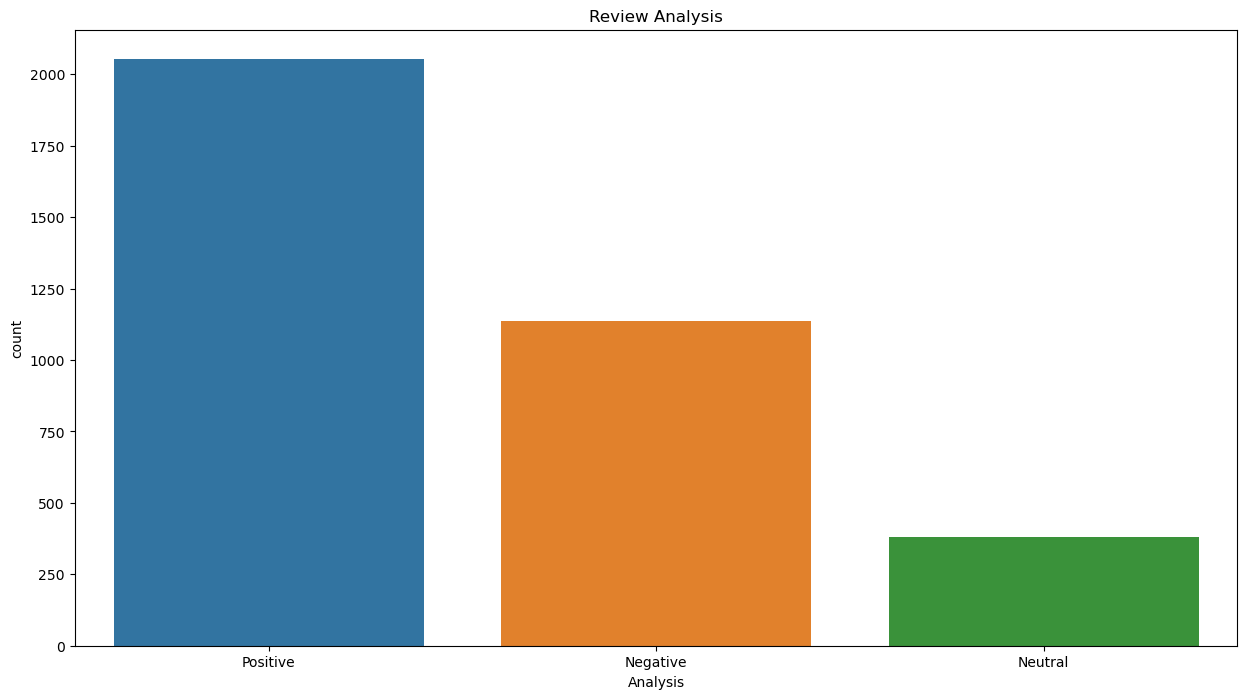

In [64]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.countplot(x=df.Analysis)
plt.title("Review Analysis")
plt.show()

In [65]:
df.to_csv("BA_reviews.csv")

**WordCloud**

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [68]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

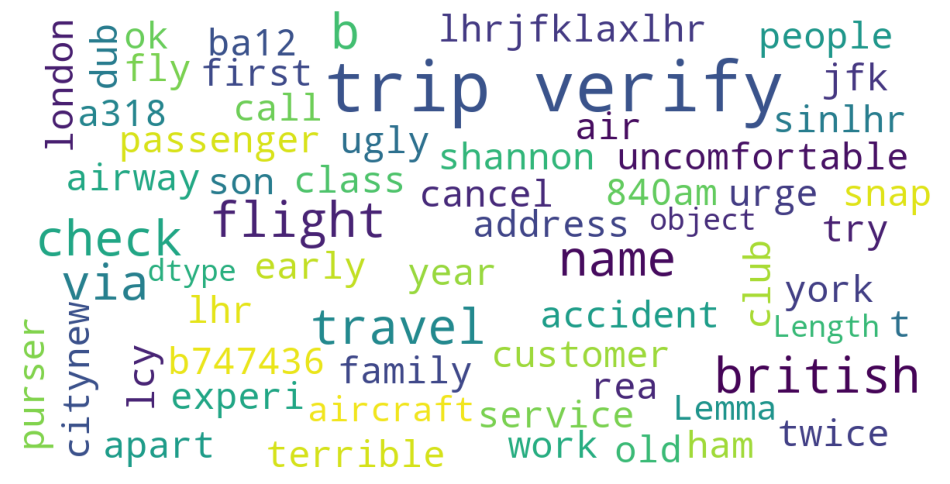

In [69]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)